Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the dataset

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

In [ ]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


Droppping a dependent variable

In [ ]:
df = df.drop('stab', axis = 1)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [ ]:
df.isna().sum()

Using StandardScaler to split the dataset in the ratio 80:20

---



In [ ]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df.drop('stabf', axis=1)
target = df['stabf']


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

#Standardising the values 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Random Forest Classifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 150)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.9235


Feature importance in the random forest classifier

In [ ]:
# Computing the importance of each feature
rf_feature_importance = clf.feature_importances_

# Normalizing the individual importances
rf_feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										clf.estimators_],
										axis = 0)

In [ ]:
feature_names = features.keys()
feature_imp = pd.Series(rf_feature_importance_normalized, index = feature_names).sort_values(ascending = False)
feature_imp

tau1    0.011011
g3      0.010851
tau3    0.010173
tau2    0.010129
g4      0.009913
tau4    0.009850
g1      0.009330
g2      0.009226
p2      0.006058
p4      0.005575
p1      0.005403
p3      0.005377
dtype: float64

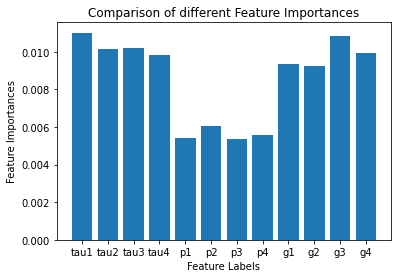

In [ ]:
# Plotting a Bar Graph to compare the models
plt.bar(features.keys(), rf_feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


Training Extra Tress Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
										criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x_train, y_train)
y_pred1 = extra_tree_forest.predict(x_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1))




ACCURACY OF THE MODEL:  0.8095


Hyper parameter tuning using RandomizedSearch CV

In [ ]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': randInt(1,6),
          'criterion' : 'entropy',
          'bootstrap':[True, False],
          'min_samples_leaf': randInt(1,4)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as randInt
from scipy.stats import uniform as sp_randFloat

param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': randInt(1,6),
          'criterion' : 'entropy',
          'bootstrap':[True, False],
          'min_samples_leaf': randInt(1,4)}
          
randm_src = RandomizedSearchCV(estimator=extra_tree_forest, param_distributions = param, cv = 5, n_iter = 10, scoring = 'accuracy', n_jobs=-1, verbose = 1, random_state = 1)
randm_src.fit(x_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/paral

KeyError: ignored

Feature Importance in Extra Trees Classifier

In [ ]:
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)


In [ ]:
feature_names = features.keys()
feature_imp = pd.Series(feature_importance_normalized, index = feature_names).sort_values(ascending = False)
feature_imp

tau2    0.011127
tau1    0.010418
tau3    0.006902
g3      0.005528
g4      0.005521
p1      0.005043
g2      0.004792
tau4    0.004745
p4      0.004408
g1      0.003962
p2      0.003399
p3      0.003102
dtype: float64

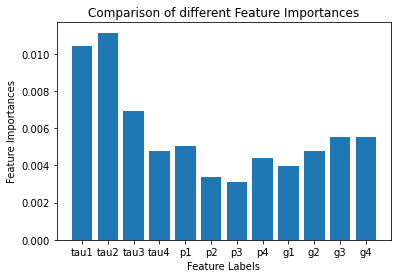

In [ ]:
# Plotting a Bar Graph to compare the models
plt.bar(features.keys(), feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


Training XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
# make predictions for test data
y_pred2 = xgb.predict(x_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred2))

ACCURACY OF THE MODEL:  0.9195


Training LightGBM model

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(learning_rate=0.1,max_depth=-5,random_state=1)
lgbm.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')
y_pred3 = lgbm.predict(x_test)
print('Training accuracy {:.4f}'.format(lgbm.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgbm.score(x_test,y_test)))

[20]	training's binary_logloss: 0.266902	training's binary_logloss: 0.266902	valid_0's binary_logloss: 0.305033	valid_0's binary_logloss: 0.305033
[40]	training's binary_logloss: 0.165854	training's binary_logloss: 0.165854	valid_0's binary_logloss: 0.222147	valid_0's binary_logloss: 0.222147
[60]	training's binary_logloss: 0.11696	training's binary_logloss: 0.11696	valid_0's binary_logloss: 0.187935	valid_0's binary_logloss: 0.187935
[80]	training's binary_logloss: 0.0865964	training's binary_logloss: 0.0865964	valid_0's binary_logloss: 0.16648	valid_0's binary_logloss: 0.16648
[100]	training's binary_logloss: 0.0663818	training's binary_logloss: 0.0663818	valid_0's binary_logloss: 0.152725	valid_0's binary_logloss: 0.152725
Training accuracy 0.9982
Testing accuracy 0.9375


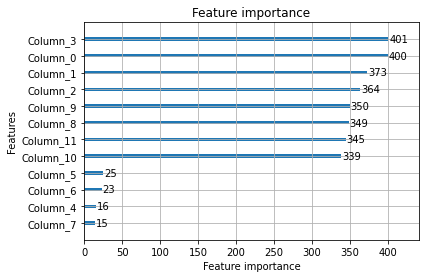

In [ ]:
lgb.plot_importance(lgbm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


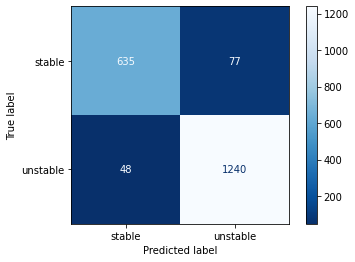

In [ ]:
metrics.plot_confusion_matrix(lgbm,x_test,y_test,cmap='Blues_r')

In [ ]:
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

